# Importacion de librerias

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Importacion del dataset

In [4]:
df = pd.read_csv('Data_Crime_Cleaning.csv')
df.head()

,id_report,date_report,date_ocurrance,time_ocurrance,area_code,area_name,district,crime_severity,crime_code,crime_desc,...,latitude,longitude,area_valid,crime_ucr,month_report,year_report,year_month_report,month_ocurrance,year_ocurrance,year_month_ocurrance
0,190326475,2020-03-01,2020-03-01,21:30:00,7,hollywood,784,grave,510,vehicle - stolen,...,34.0375,-118.3506,True,property crime,3,2020,2020-03,3,2020,2020-03
1,200106753,2020-02-09,2020-02-08,18:00:00,1,77th street,182,grave,330,burglary from vehicle,...,34.0444,-118.2628,True,property crime,2,2020,2020-02,2,2020,2020-02
2,200320258,2020-11-11,2020-11-04,17:00:00,3,devonshire,356,grave,480,bike - stolen,...,34.0210,-118.3002,True,property crime,11,2020,2020-11,11,2020,2020-11
3,200907217,2023-05-10,2020-03-10,20:37:00,9,n hollywood,964,grave,343,shoplifting-grand theft ($950.01 & over),...,34.1576,-118.4387,True,property crime,5,2023,2023-05,3,2020,2020-03
4,220614831,2022-08-18,2020-08-17,12:00:00,6,hollenbeck,666,menos grave,354,theft of identity,...,34.0944,-118.3277,True,property crime,8,2022,2022-08,8,2020,2020-08


In [5]:
df.columns

Index(['id_report', 'date_report', 'date_ocurrance', 'time_ocurrance',
       'area_code', 'area_name', 'district', 'crime_severity', 'crime_code',
       'crime_desc', 'crime_mo', 'age_victim', 'sex_victim', 'descent_victim',
       'loc_code', 'loc_desc', 'weapon_code', 'weapon_desc',
       'case_status_code', 'case_status_desc', 'crime_code_2', 'location',
       'cross_street', 'latitude', 'longitude', 'area_valid', 'crime_ucr',
       'month_report', 'year_report', 'year_month_report', 'month_ocurrance',
       'year_ocurrance', 'year_month_ocurrance'],
      dtype='object')

# Analisis exploratorio

## Seleccion de variables a estudiar

In [6]:
descent_map = {
    'a': 'other asian',
    'b': 'black',
    'c': 'chinese',
    'd': 'cambodian',
    'f': 'filipino',
    'g': 'guamanian',
    'h': 'hispanic/latin/mexican',
    'i': 'american indian/alaskan native',
    'j': 'japanese',
    'k': 'korean',
    'l': 'laotian',
    'o': 'other',
    'p': 'pacific islander',
    's': 'samoan',
    'u': 'hawaiian',
    'v': 'vietnamese',
    'w': 'white',
    'x': 'unknown',
    'z': 'asian indian',
    '-': 'unknown',
}


In [7]:
df['descent_victim_map'] = df['descent_victim'].map(descent_map)

In [8]:
df.head()

,id_report,date_report,date_ocurrance,time_ocurrance,area_code,area_name,district,crime_severity,crime_code,crime_desc,...,longitude,area_valid,crime_ucr,month_report,year_report,year_month_report,month_ocurrance,year_ocurrance,year_month_ocurrance,descent_victim_map
0,190326475,2020-03-01,2020-03-01,21:30:00,7,hollywood,784,grave,510,vehicle - stolen,...,-118.3506,True,property crime,3,2020,2020-03,3,2020,2020-03,other
1,200106753,2020-02-09,2020-02-08,18:00:00,1,77th street,182,grave,330,burglary from vehicle,...,-118.2628,True,property crime,2,2020,2020-02,2,2020,2020-02,other
2,200320258,2020-11-11,2020-11-04,17:00:00,3,devonshire,356,grave,480,bike - stolen,...,-118.3002,True,property crime,11,2020,2020-11,11,2020,2020-11,unknown
3,200907217,2023-05-10,2020-03-10,20:37:00,9,n hollywood,964,grave,343,shoplifting-grand theft ($950.01 & over),...,-118.4387,True,property crime,5,2023,2023-05,3,2020,2020-03,other
4,220614831,2022-08-18,2020-08-17,12:00:00,6,hollenbeck,666,menos grave,354,theft of identity,...,-118.3277,True,property crime,8,2022,2022-08,8,2020,2020-08,hispanic/latin/mexican


In [9]:
features_study = ['crime_severity','crime_code','crime_desc','crime_ucr','age_victim','sex_victim','descent_victim','crime_mo','descent_victim_map']

In [10]:
df_study = df[features_study]

In [11]:
df_study.info()
df_study.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986415 entries, 0 to 986414
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   crime_severity      986415 non-null  object
 1   crime_code          986415 non-null  int64 
 2   crime_desc          986415 non-null  object
 3   crime_ucr           986415 non-null  object
 4   age_victim          986415 non-null  int64 
 5   sex_victim          986415 non-null  object
 6   descent_victim      986415 non-null  object
 7   crime_mo            840000 non-null  object
 8   descent_victim_map  986415 non-null  object
dtypes: int64(2), object(7)
memory usage: 67.7+ MB


,crime_code,age_victim
count,986415.000000,986415.000000
mean,500.771399,37.006293
std,206.089816,14.019379
min,110.000000,2.000000
25%,331.000000,29.000000
50%,442.000000,31.000000
75%,626.000000,44.000000
max,956.000000,120.000000


In [12]:
df_study.select_dtypes(include='object').describe()

,crime_severity,crime_desc,crime_ucr,sex_victim,descent_victim,crime_mo,descent_victim_map
count,986415,986415,986415,986415,986415,840000,986415
unique,2,140,10,4,20,309548,19
top,grave,vehicle - stolen,property crime,m,h,0344,hispanic/latin/mexican
freq,588249,111625,601847,398026,293068,41144,293068


En descent_victim_map salen 19 porque 'x' y '-' son unknow

In [13]:
df_study.head(10)

,crime_severity,crime_code,crime_desc,crime_ucr,age_victim,sex_victim,descent_victim,crime_mo,descent_victim_map
0,grave,510,vehicle - stolen,property crime,30,m,o,NaN,other
1,grave,330,burglary from vehicle,property crime,47,m,o,1822 1402 0344,other
2,grave,480,bike - stolen,property crime,19,x,x,0344 1251,unknown
3,grave,343,shoplifting-grand theft ($950.01 & over),property crime,19,m,o,0325 1501,other
4,menos grave,354,theft of identity,property crime,28,m,h,1822 1501 0930 2004,hispanic/latin/mexican
5,menos grave,354,theft of identity,property crime,41,m,h,1822 0100 0930 0929,hispanic/latin/mexican
6,menos grave,354,theft of identity,property crime,25,m,h,0930 0929,hispanic/latin/mexican
7,menos grave,354,theft of identity,property crime,27,f,b,0100,black
8,menos grave,354,theft of identity,property crime,24,f,b,0100,black
9,menos grave,624,battery - simple assault,violent crime,26,m,h,0416,hispanic/latin/mexican


# Plots

## Histograma de las variables menos repetidas

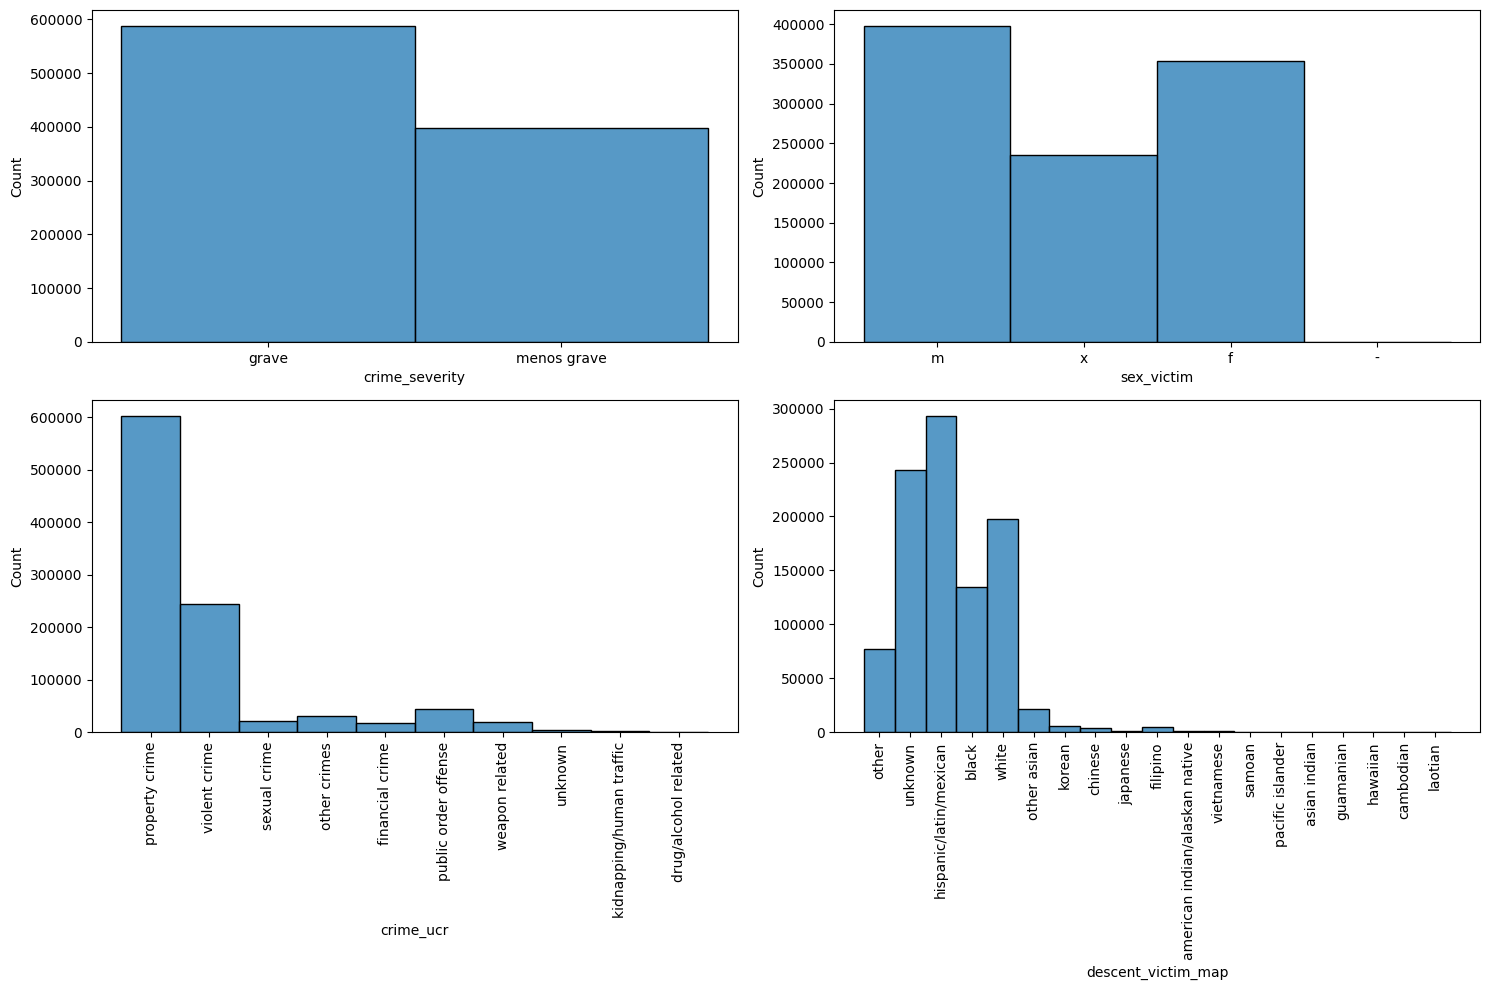

In [14]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

sns.histplot(df_study['crime_severity'],ax=axes[0,0])
sns.histplot(df_study['sex_victim'],ax=axes[0,1])

sns.histplot(df_study['crime_ucr'],ax=axes[1,0])
axes[1, 0].tick_params(axis='x', rotation=90)
sns.histplot(df_study['descent_victim_map'],ax=axes[1,1])
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()  #Asi ajusto el espacio entre los subplots
plt.show()


## Hallar que cantidad de cada indivuduo hay cometido un crimen y que descendencia tiene

In [15]:
df_study['crime_ucr'].value_counts()/df_study.shape[0]*100

crime_ucr
property crime              61.013569
violent crime               24.699341
public order offense         4.431705
other crimes                 3.179899
sexual crime                 2.229690
weapon related               2.014973
financial crime              1.770553
unknown                      0.439065
kidnapping/human traffic     0.211777
drug/alcohol related         0.009428
Name: count, dtype: float64

In [16]:
df['descent_victim_map'].value_counts()/df_study.shape[0]*100

descent_victim_map
hispanic/latin/mexican            29.710416
unknown                           24.688392
white                             20.047647
black                             13.628848
other                              7.803916
other asian                        2.136727
korean                             0.579878
filipino                           0.465524
chinese                            0.438963
japanese                           0.152674
vietnamese                         0.114252
american indian/alaskan native     0.099350
asian indian                       0.054440
pacific islander                   0.028284
hawaiian                           0.021492
cambodian                          0.008921
laotian                            0.007401
guamanian                          0.007299
samoan                             0.005576
Name: count, dtype: float64

In [17]:
conteo = df_study[df_study['crime_ucr'] == 'unknown']['crime_code'].value_counts()
print(conteo)


crime_code
648    2551
845     963
647     791
870      26
Name: count, dtype: int64


In [18]:
df_study.loc[df['crime_code']== 522].head()

,crime_severity,crime_code,crime_desc,crime_ucr,age_victim,sex_victim,descent_victim,crime_mo,descent_victim_map
2114,grave,522,"vehicle, stolen - other (motorized scooters, b...",property crime,31,x,-,NaN,unknown
2449,grave,522,"vehicle, stolen - other (motorized scooters, b...",property crime,30,x,x,0344,unknown
4936,grave,522,"vehicle, stolen - other (motorized scooters, b...",property crime,59,m,w,1402,white
5722,grave,522,"vehicle, stolen - other (motorized scooters, b...",property crime,36,m,i,1822 0344 0394 0947,american indian/alaskan native
6127,grave,522,"vehicle, stolen - other (motorized scooters, b...",property crime,28,m,o,0344,other


## Descent_victim by crime

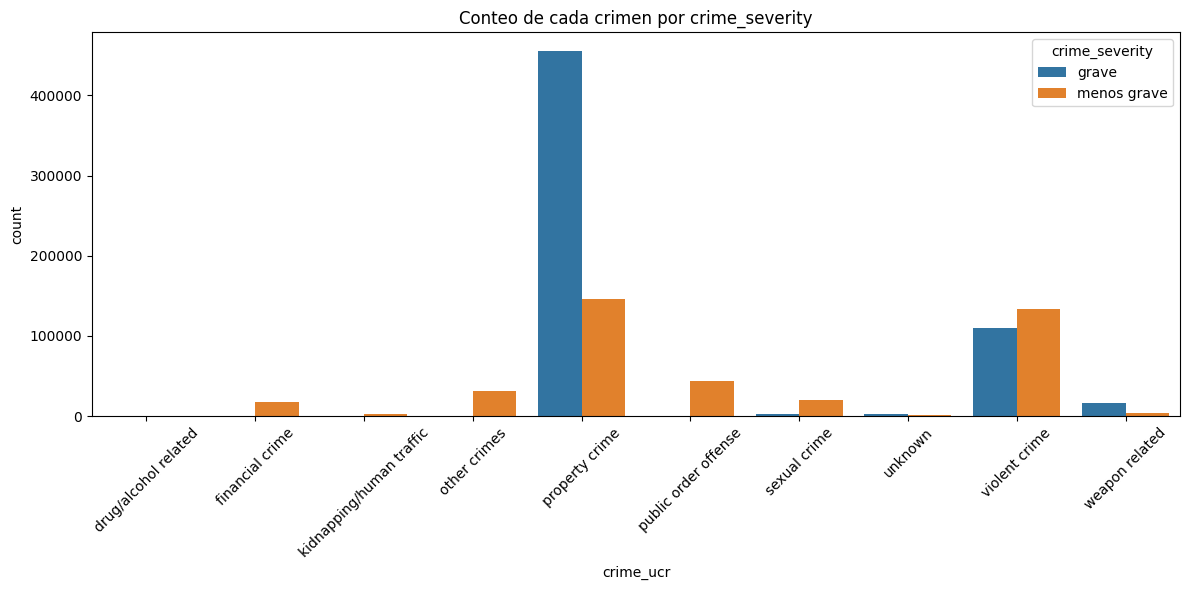

In [19]:
count_df = df_study.groupby(['crime_ucr', 'crime_severity']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=count_df, x='crime_ucr', y='count', hue='crime_severity')
plt.xticks(rotation=45)
plt.title('Conteo de cada crimen por crime_severity')
plt.tight_layout()
plt.show()

In [20]:
top_4_descent = df_study['descent_victim_map'].value_counts().nlargest(4).index


In [21]:
top_4_descent


Index(['hispanic/latin/mexican', 'unknown', 'white', 'black'], dtype='object', name='descent_victim_map')

In [22]:
df_filtro_descent = df_study[df_study['descent_victim_map'].isin(top_4_descent)]
df_filtro_descent.head()

,crime_severity,crime_code,crime_desc,crime_ucr,age_victim,sex_victim,descent_victim,crime_mo,descent_victim_map
2,grave,480,bike - stolen,property crime,19,x,x,0344 1251,unknown
4,menos grave,354,theft of identity,property crime,28,m,h,1822 1501 0930 2004,hispanic/latin/mexican
5,menos grave,354,theft of identity,property crime,41,m,h,1822 0100 0930 0929,hispanic/latin/mexican
6,menos grave,354,theft of identity,property crime,25,m,h,0930 0929,hispanic/latin/mexican
7,menos grave,354,theft of identity,property crime,27,f,b,0100,black


In [23]:
df_filtro_descent.shape

(868788, 9)

In [24]:
top_5_crime_ucr = df_filtro_descent['crime_ucr'].value_counts().nlargest(5).index
top_5_crime_ucr

Index(['property crime', 'violent crime', 'public order offense',
       'other crimes', 'sexual crime'],
      dtype='object', name='crime_ucr')

In [25]:
df_filtro_crime = df_filtro_descent[df_filtro_descent['crime_ucr'].isin(top_5_crime_ucr)]
df_filtro_crime.shape


(830100, 9)

In [26]:
df_filtro_crime.head()

,crime_severity,crime_code,crime_desc,crime_ucr,age_victim,sex_victim,descent_victim,crime_mo,descent_victim_map
2,grave,480,bike - stolen,property crime,19,x,x,0344 1251,unknown
4,menos grave,354,theft of identity,property crime,28,m,h,1822 1501 0930 2004,hispanic/latin/mexican
5,menos grave,354,theft of identity,property crime,41,m,h,1822 0100 0930 0929,hispanic/latin/mexican
6,menos grave,354,theft of identity,property crime,25,m,h,0930 0929,hispanic/latin/mexican
7,menos grave,354,theft of identity,property crime,27,f,b,0100,black


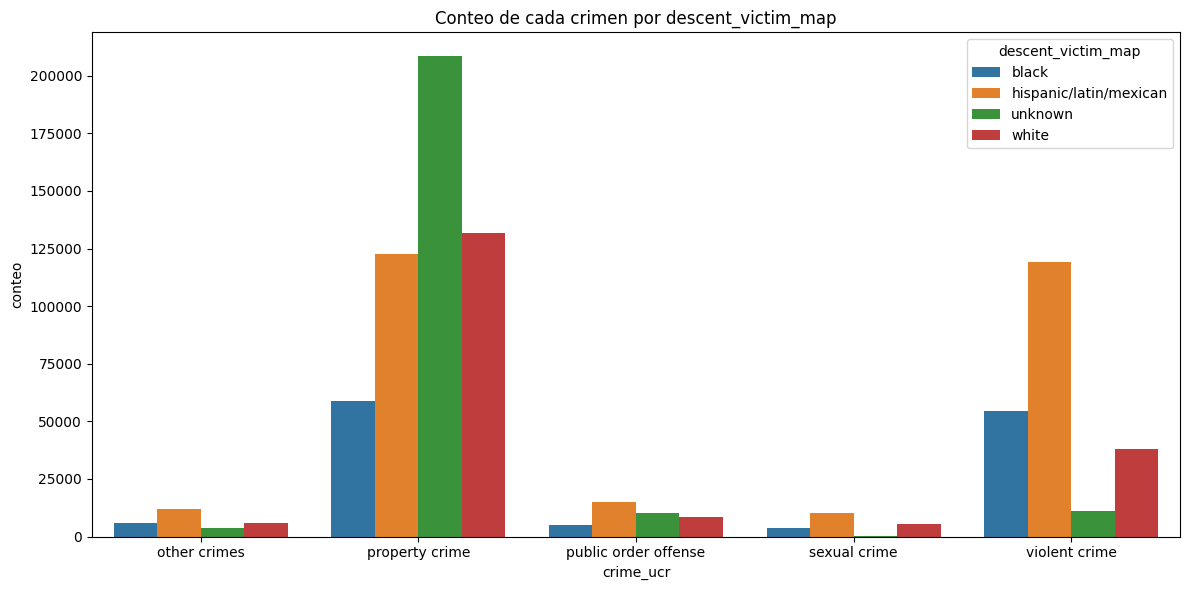

In [27]:
count_df = df_filtro_crime.groupby(['crime_ucr', 'descent_victim_map']).size().reset_index(name='conteo')

plt.figure(figsize=(12, 6))
sns.barplot(data=count_df, x='crime_ucr', y='conteo', hue='descent_victim_map')
plt.title('Conteo de cada crimen por descent_victim_map')
plt.tight_layout()
plt.show()

## Crime_ucr by age

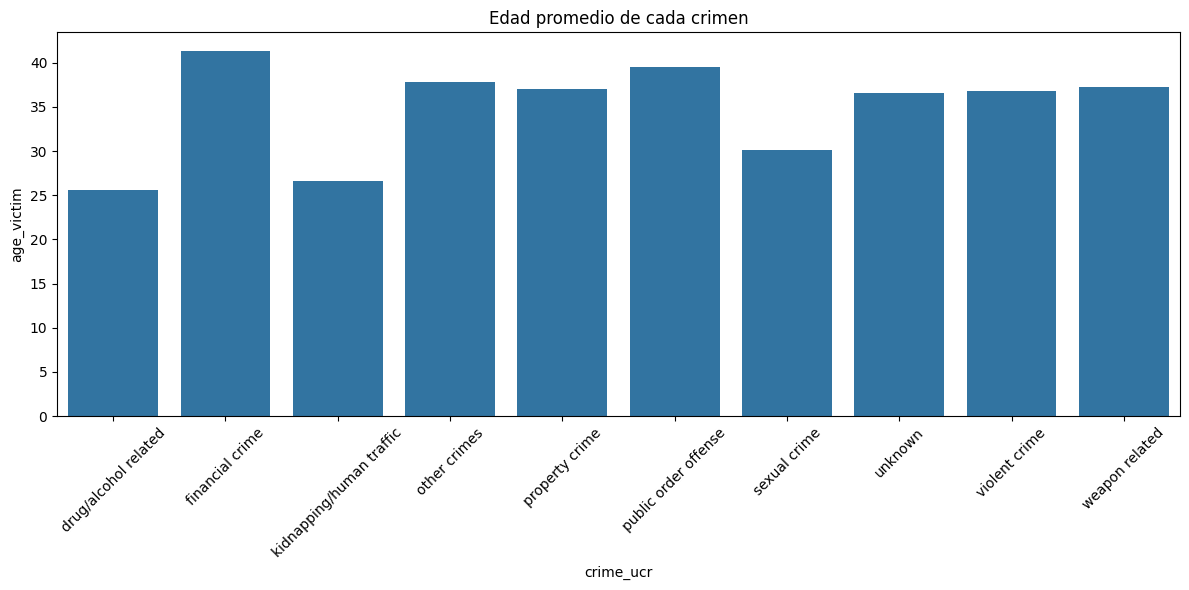

In [28]:
df_age =df_study.groupby('crime_ucr').mean('age_victim')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_age, x='crime_ucr', y='age_victim')
plt.xticks(rotation=45)
plt.title('Edad promedio de cada crimen')
plt.tight_layout()
plt.show()

## Study of sexual crime

In [29]:
df_study.head()

,crime_severity,crime_code,crime_desc,crime_ucr,age_victim,sex_victim,descent_victim,crime_mo,descent_victim_map
0,grave,510,vehicle - stolen,property crime,30,m,o,NaN,other
1,grave,330,burglary from vehicle,property crime,47,m,o,1822 1402 0344,other
2,grave,480,bike - stolen,property crime,19,x,x,0344 1251,unknown
3,grave,343,shoplifting-grand theft ($950.01 & over),property crime,19,m,o,0325 1501,other
4,menos grave,354,theft of identity,property crime,28,m,h,1822 1501 0930 2004,hispanic/latin/mexican


In [30]:
df_study_sexual_crime = df_study.loc[df_study['crime_ucr'] == 'sexual crime']


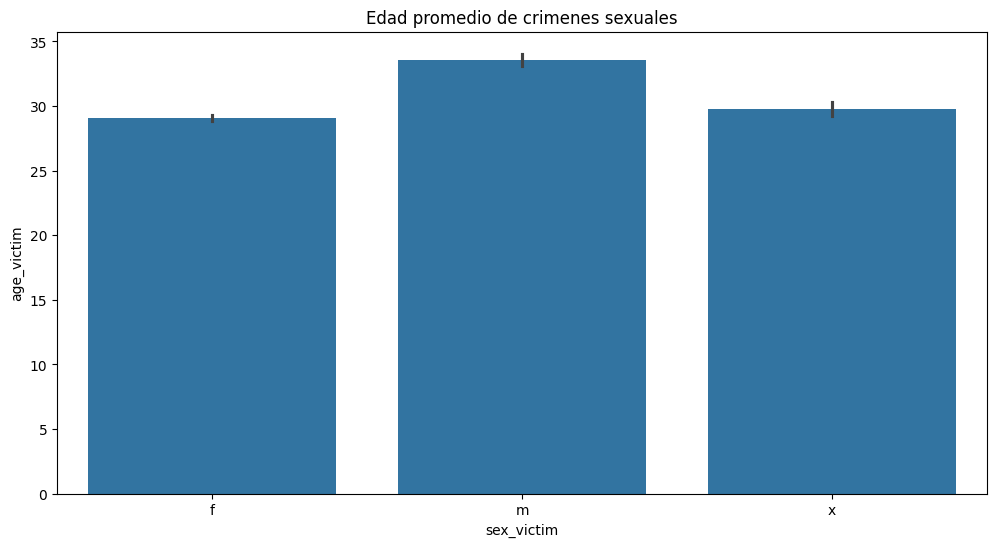

In [31]:


plt.figure(figsize=(12, 6))
sns.barplot(data=df_study_sexual_crime, x='sex_victim', y='age_victim')
plt.title('Edad promedio de crimenes sexuales')
plt.show()



In [32]:
df_study['sex_victim'].value_counts()


sex_victim
m    398026
f    353659
x    234729
-         1
Name: count, dtype: int64

### Edad promedio de víctima por tipo de crimen	

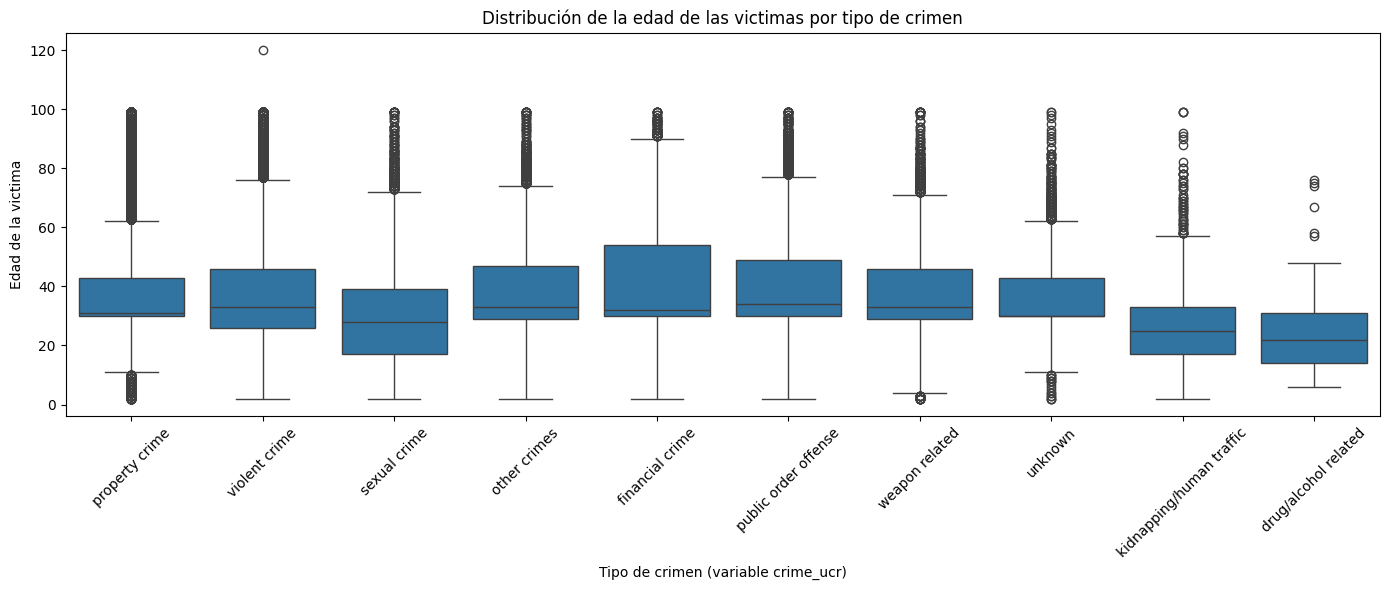

In [ ]:
# Creamos el gráfico
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_study, x='crime_ucr', y='age_victim')
plt.xticks(rotation=45)
plt.title('Distribución de la edad de las victimas por tipo de crimen')
plt.xlabel('Tipo de crimen (variable crime_ucr)')
plt.ylabel('Edad de la victima')
plt.tight_layout()
plt.show()

In [39]:
df_study_prop = df_study.loc[(df_study['crime_ucr'] == 'property crime')&(df_study['crime_ucr'] == 'violent crime')]

### Frecuencia de crímenes por sexo y crimen	

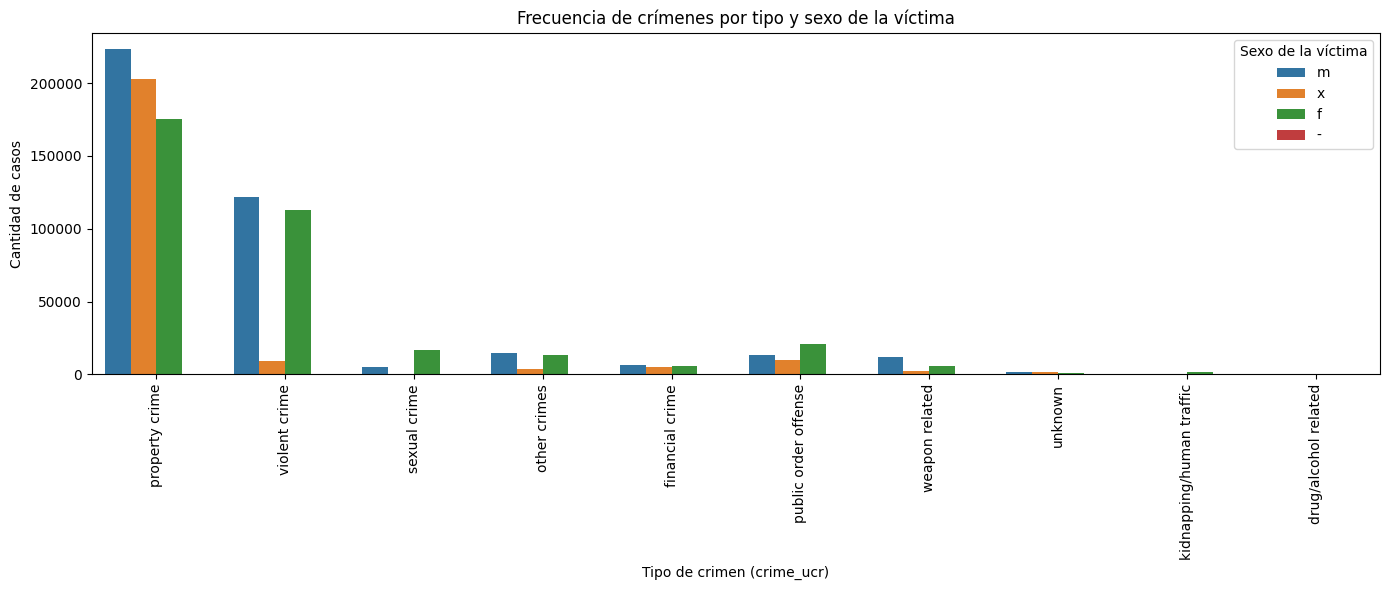

In [34]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_study, x='crime_ucr', hue='sex_victim')
plt.xticks(rotation=90)
plt.title('Frecuencia de crímenes por tipo y sexo de la víctima')
plt.xlabel('Tipo de crimen (crime_ucr)')
plt.ylabel('Cantidad de casos')
plt.legend(title='Sexo de la víctima')
plt.tight_layout()
plt.show()

### Gravedad del crimen por tipo	

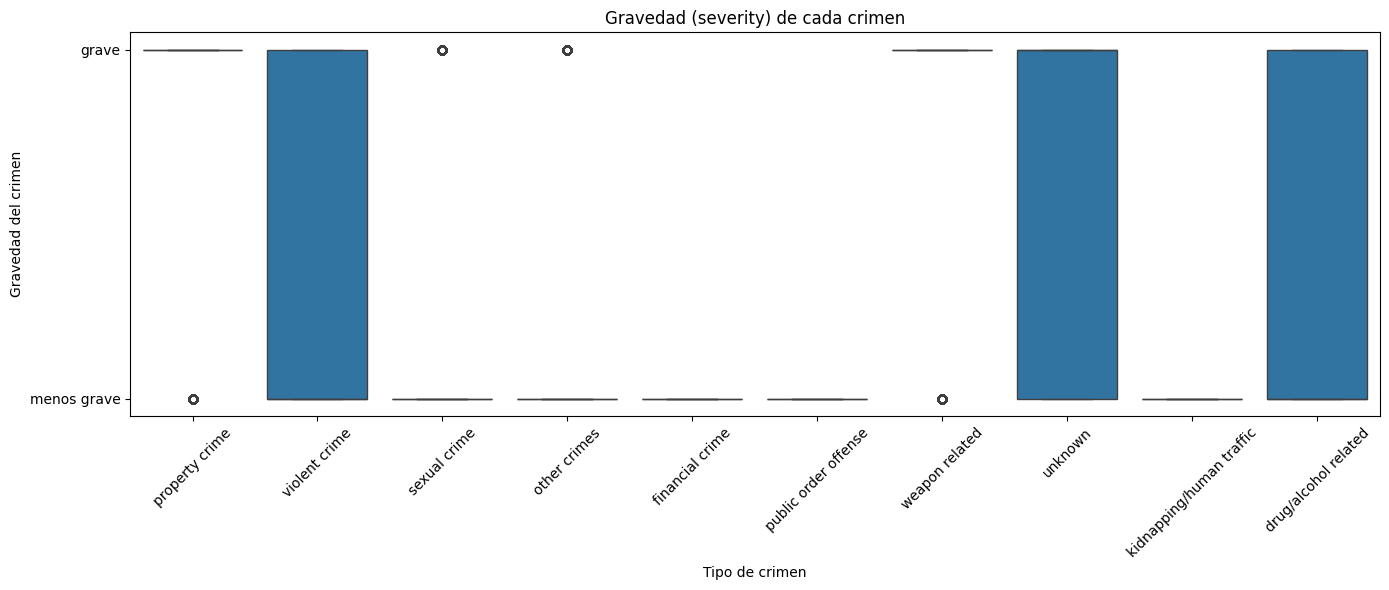

In [35]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_study, x='crime_ucr', y='crime_severity')
plt.xticks(rotation=45)
plt.title('Gravedad (severity) de cada crimen')
plt.xlabel('Tipo de crimen')
plt.ylabel('Gravedad del crimen')
plt.tight_layout()
plt.show()

### Crimen vs grupo étnico	

In [36]:
df_study_without_unknown = df_study.loc[df_study['descent_victim_map'] != 'unknown']
heatmap_data = pd.crosstab(df_study_without_unknown['descent_victim_map'], df_study_without_unknown['crime_ucr'])

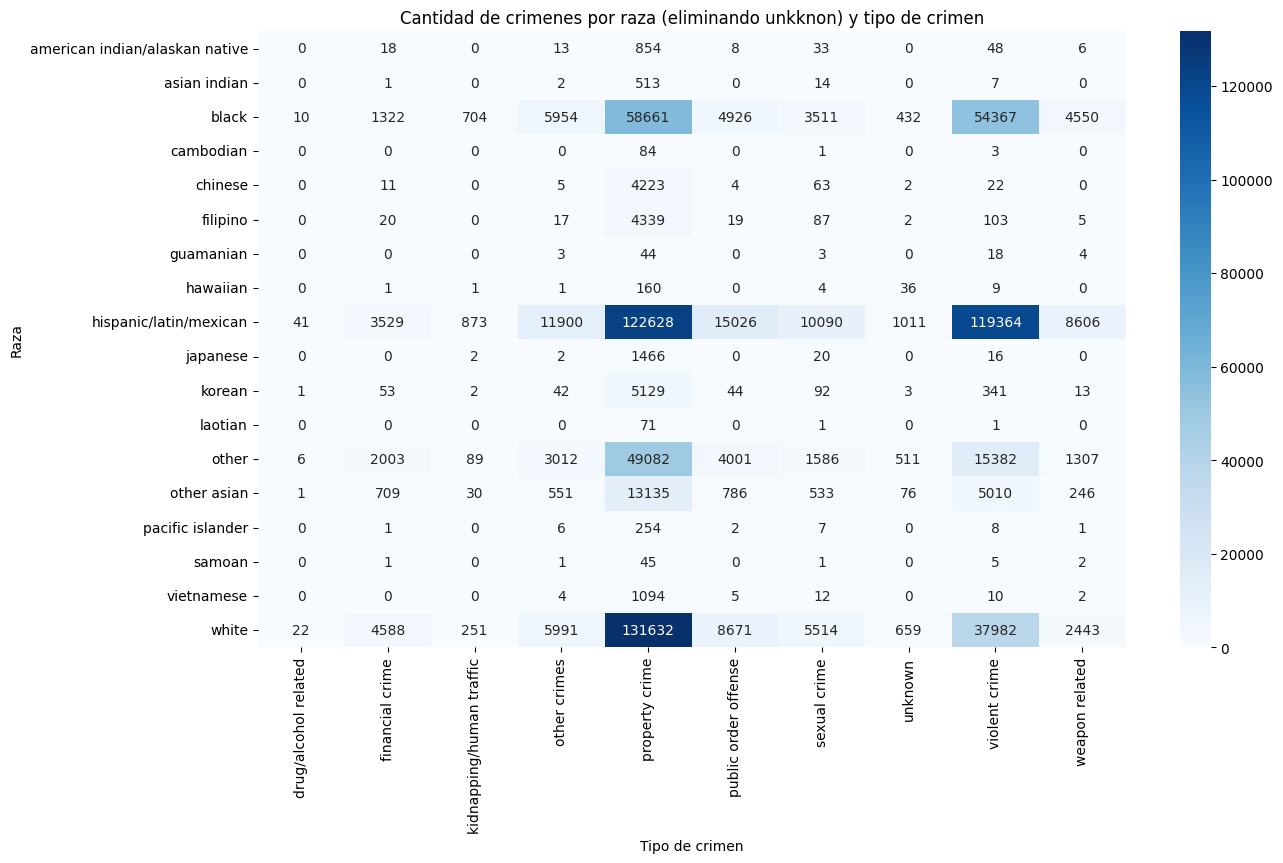

In [37]:
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d')
plt.title('Cantidad de crimenes por raza (eliminando unkknon) y tipo de crimen')
plt.xlabel('Tipo de crimen')
plt.ylabel('Raza')
plt.show()

# Temporales